# Test of class Hamiltonian_QED

This notebook uses the class in 'Hamiltonian_QED.py' that builds the Hamiltonian in terms of Pauli matrices.

The code import the class in 'HC_Lattice.py' (that defines the lattice) and then is uses the Gray encoding for gauge fields (E and U) and Jordan-Wigner formulation for fermionic degrees of freedom.

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from scipy.sparse.linalg import eigsh
from qiskit.quantum_info import Statevector
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("../") # go to parent dir

In [5]:
from Hamiltonian_QED import HamiltonianQED

In [259]:
#class input parameters:
nx_sites=2
ny_sites=2
g=1
fact_e_op = 1
fact_b_op = 1
m=7
omega=1
l=1
L=1
magnetic_basis=False
pbc=True
puregauge = False
static_charges_values =None#{(0,0):-1,(1,0):1}
display_hamiltonian=True
e_op_out_plus=False #if E out of site n has plus sign 
ksphase =True#TODO: use this==true by default for H_k, is the correct factor
tn_comparison = False #TODO only kept for TN comparison, remove later


#exact diagonalisation parameters:
threshold = 1e-12
num_eigs = 5

In [260]:
class_H = HamiltonianQED(nx_sites,
                        ny_sites,
                        g,
                        fact_e_op,
                        fact_b_op,
                        m,
                        omega,
                        l,
                        ll=L,
                        magnetic_basis=magnetic_basis,
                        pbc=pbc,
                        puregauge=puregauge,
                        static_charges_values=static_charges_values,
                        display_hamiltonian=display_hamiltonian,
                        e_op_out_plus = e_op_out_plus,
                        ksphase  = ksphase,
                        lambd=1000.,
                        tn_comparison=tn_comparison)

>> Gauss law system of equations (symbolic + latex):


Eq(-E_00x - E_00y + E_01y + E_10x - q_00, 0)

Eq(E_00y - E_01x - E_01y + E_11x - q_01, 0)

Eq(E_00x - E_10x - E_10y + E_11y - q_10, 0)

Eq(E_01x + E_10y - E_11x - E_11y - q_11, 0)

Eq(q_00 + q_01 + q_10 + q_11, 0)

- E_{00x} - E_{00y} + E_{01y} + E_{10x} - q_{00} &= 0 \\ \nonumber
E_{00y} - E_{01x} - E_{01y} + E_{11x} - q_{01} &= 0 \\ \nonumber
E_{00x} - E_{10x} - E_{10y} + E_{11y} - q_{10} &= 0 \\ \nonumber
E_{01x} + E_{10y} - E_{11x} - E_{11y} - q_{11} &= 0 \\ \nonumber
q_{00} + q_{01} + q_{10} + q_{11} &= 0 

>> Hamiltonian (symbolic + latex):


Eq(H_E, g**2*(E_01y**2 + E_10x**2 + E_10y**2 + E_11x**2 + E_11y**2 + (E_10x + E_10y - E_11y + q_10)**2 + (-E_10y + E_11x + E_11y + q_11)**2 + (E_01y - E_10y + E_11y + q_01 + q_11)**2)/2)

H_{E} = \frac{g^{2} \left(E_{01y}^{2} + E_{10x}^{2} + E_{10y}^{2} + E_{11x}^{2} + E_{11y}^{2} + \left(E_{10x} + E_{10y} - E_{11y} + q_{10}\right)^{2} + \left(- E_{10y} + E_{11x} + E_{11y} + q_{11}\right)^{2} + \left(E_{01y} - E_{10y} + E_{11y} + q_{01} + q_{11}\right)^{2}\right)}{2}


Eq(H_B, -(U_10x*Dagger(U_11x)*Dagger(U_10y) + U_10y + U_11x*U_01y*Dagger(U_10x)*Dagger(U_11y) + U_11y*Dagger(U_01y) + h.c.)/(2*g**2))

H_{B} = - \frac{U_{10x} U_{11x}^{\dagger} U_{10y}^{\dagger} + U_{10y} + U_{11x} U_{01y} U_{10x}^{\dagger} U_{11y}^{\dagger} + U_{11y} U_{01y}^{\dagger} + h.c.}{2 g^{2}}


Eq(H_K, Omega*(-Dagger(Phi_2)*U_01y*Phi_1 + Dagger(Phi_4)*U_10x*Phi_1 - Dagger(Phi_4)*U_10y*Phi_3 + Dagger(Phi_3)*U_11x*Phi_2 + Dagger(Phi_3)*U_11y*Phi_4 + h.c. + Dagger(Phi_1)*Phi_2 + Dagger(Phi_1)*Phi_4 + Dagger(Phi_2)*Phi_3)/2)

H_{K} = \frac{\Omega \left(- \Phi_{2}^{\dagger} U_{01y} \Phi_{1} + \Phi_{4}^{\dagger} U_{10x} \Phi_{1} - \Phi_{4}^{\dagger} U_{10y} \Phi_{3} + \Phi_{3}^{\dagger} U_{11x} \Phi_{2} + \Phi_{3}^{\dagger} U_{11y} \Phi_{4} + h.c. + \Phi_{1}^{\dagger} \Phi_{2} + \Phi_{1}^{\dagger} \Phi_{4} + \Phi_{2}^{\dagger} \Phi_{3}\right)}{2}


Eq(H_m, m*(Dagger(Phi_1)*Phi_1 - Dagger(Phi_2)*Phi_2 + Dagger(Phi_3)*Phi_3 - Dagger(Phi_4)*Phi_4))

H_{m} = m \left(\Phi_{1}^{\dagger} \Phi_{1} - \Phi_{2}^{\dagger} \Phi_{2} + \Phi_{3}^{\dagger} \Phi_{3} - \Phi_{4}^{\dagger} \Phi_{4}\right)
>> Gauss law applied and Hamiltonian built.  Execution time: 0.14284420013427734 seconds
>> Suppression term built.  Execution time: 0.015166044235229492 seconds


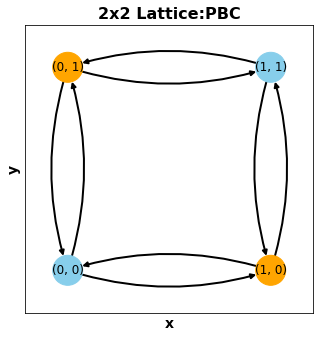

In [261]:
class_H.draw_graph_func(gauss_law_fig=False)#,savefig_dir='.')

[6, 7, 5, 4, 3]
[((0, 1), (0, 0)), ((1, 1), (1, 0)), ((1, 1), (0, 1)), ((1, 0), (0, 0)), ((1, 0), (1, 1))]


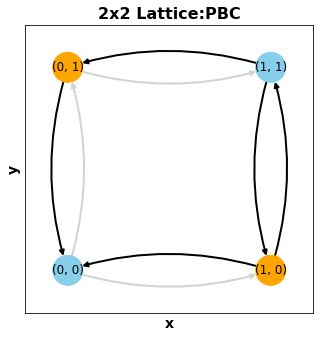

In [262]:
#only dynamical fields after Gauss law applied
class_H.draw_graph_func(gauss_law_fig=True)#,savefig_dir='.')

In [263]:
class_H.u_op_free

[U_01y, U_11y, U_11x, U_10x, U_10y]

In [8]:
print('is hermitian:',class_H.hamiltonian_tot.is_hermitian())

spectrum, eigenvectors_matrix = eigsh(class_H.hamiltonian_tot.to_spmatrix(),k=num_eigs,which="SA",ncv = 50)#

idx = spectrum.argsort() 
spectrum = spectrum[idx]
eigenvectors_matrix = eigenvectors_matrix[:,idx]
print(f'Spectrum of H with pbc{pbc}_g{g}_l{l}_factE{fact_e_op}_factB{fact_b_op}_m{m}_Omega{omega}_phase_hk{ksphase}_TN{tn_comparison}')


for kk,evalu in enumerate(spectrum):
        if evalu<900:# only physical states, 1000 corresponds to factor of penalty term
                print(f'E_{kk}=',round(evalu,8))
                

is hermitian: True
Spectrum of H with pbcTrue_g1_l1_factE1_factB1_m7_Omega1_phase_hkTrue_TNFalse
E_0= -15.13835568
E_1= -14.39442139
E_2= -14.39236105
E_3= -14.33445665
E_4= -14.32545276


In [9]:
#plaquette
print('plaq.',(Statevector(np.array(eigenvectors_matrix[:,0])).expectation_value(class_H.hamiltonian_mag_pauli).real)/len(class_H.plaq_list))


plaq. 0.45957019480452915
